# Sonification of Chromagrams
In this notebook, we illustrate the sonification of chromagrams using the ```libsoni.core.chroma``` module. A chromagram can be seen as a representation of the distribution of musical pitch classes, a feature often used in MIR Applications.

In [1]:
import os
import sys
import numpy as np
import librosa, librosa.display
import pandas as pd

from matplotlib import pyplot as plt
import IPython.display as ipd

from libsoni.util.utils import mix_sonification_and_original
from libsoni.core.chroma import sonify_chromagram
from libsoni.core.methods import generate_shepard_tone

sys.path.append('..')
import libfmp.b
import libfmp.c8

%matplotlib inline

Fs = 22050
H = 1024

## Simple Scenario: C Major Cadence
To start with a simple example, let's look at the chords of a C major cadence: **C:maj**, **F:maj** and **G:maj**.
<img src="figures/demo_chroma/C_Major_Cadence.png" alt="C-Major-Triad" width="500">

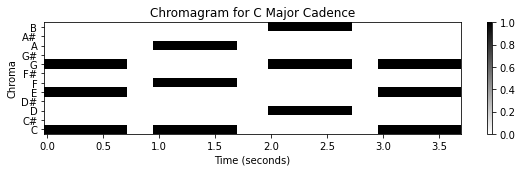

In [2]:
C_Maj_Cadence_Chords_pitchclasses = [(0,4,7), (5,9,0), (2,7,11), (0,4,7)]

starts = [0, 1, 2, 3]

durations = [0.75, 0.75, 0.75, 0.75]

Fs_frame = Fs / H



Chromagram_C_Maj_Cadence = np.zeros((12,int((starts[-1]+durations[-1])*Fs/H)))


for i in range(len(starts)):
    Chromagram_C_Maj_Cadence[C_Maj_Cadence_Chords_pitchclasses[i],int(starts[i]*Fs/H):int((starts[i]+durations[i])*Fs/H)]=1

title = 'Chromagram for C Major Cadence'
libfmp.b.plot_chromagram(Chromagram_C_Maj_Cadence, Fs=Fs_frame, title=title, figsize=(8, 2.5))
plt.show()

### Sonification using Shepard Tones

In [3]:
shepard_tone = generate_shepard_tone()

ipd.display(ipd.Audio(shepard_tone, rate=Fs))

In [4]:
one_octave_shepard = np.asarray([])

for pitch_class in np.arange(0,13):
    
    one_octave_shepard=np.append(one_octave_shepard, generate_shepard_tone(pitch_class%12))

print('Shepard tone for one octave:')
ipd.display(ipd.Audio(one_octave_shepard,rate=Fs))

Shepard tone for one octave:


### Sonified C Major Cadence

In [5]:
# Sonification using libsoni
x_chroma_ann = sonify_chromagram(Chromagram_C_Maj_Cadence,H=512,fs=Fs)

print('Sonification of chroma-based respresentation of the C Major Cadence:')
ipd.display(ipd.Audio(x_chroma_ann, rate=Fs))

Sonification of chroma-based respresentation of the C Major Cadence:


### Customizing the Sonification

Some sound changing parameters can be passed to ```sonify_chromagram``` in order to change the shepard tones. 

- ```pitch_range```: Tuple defining which pitch range to encounter in shepard tone
- ```filter```: bool, deciding, if shepard tones are filtered or not
- ```f_center``` : float, center_frequency in Hertz for bell-shaped filter
- ```octave_cutoff```: int, determines, at which multiple of f_center, the harmonics get attenuated by 2.
Let's show some examples:

In [6]:
# Shepard tone, default
shepard_tone = generate_shepard_tone()
print('Shepard tone, default:')
ipd.display(ipd.Audio(shepard_tone, rate=Fs))

# Shepard tone with small, high pitch range
shepard_tone_small_pitch_range_high = generate_shepard_tone(pitch_range=(60,84))
print('Shepard tone with small, high pitch range:')
ipd.display(ipd.Audio(shepard_tone_small_pitch_range_high, rate=Fs))

# Shepard tone with small, low pitch range
shepard_tone_small_pitch_range_low = generate_shepard_tone(pitch_range=(36,60))
print('Shepard tone with small, low pitch range:')
ipd.display(ipd.Audio(shepard_tone_small_pitch_range_low, rate=Fs))

# Narrow filtered Shepard tone with low center frequency:
shepard_tone_filtered_low = generate_shepard_tone(filter=True, f_center=100, octave_cutoff=1)
print('Narrow filtered Shepard tone with low center frequency:')
ipd.display(ipd.Audio(shepard_tone_filtered_low, rate=Fs))

# Wide filtered Shepard tone with high center frequency:
shepard_tone_filtered_low = generate_shepard_tone(pitch_range=(50,127), filter=True, f_center=1000, octave_cutoff=3)
print('Wide filtered Shepard tone with high center frequency:')
ipd.display(ipd.Audio(shepard_tone_filtered_low, rate=Fs))

Shepard tone, default:


Shepard tone with small, high pitch range:


Shepard tone with small, low pitch range:


Narrow filtered Shepard tone with low center frequency:


Wide filtered Shepard tone with high center frequency:


## Scenario: *Gute Nacht* by *Franz Schubert*
<img src="figures/demo_chroma/Schubert_D911-01_score.png" alt="Gute Nacht" width="600">

In [7]:
fn_wav = os.path.join('data_audio', 'demo_chroma', 'Schubert_D911-01_HU33.wav') #442,29 Hz

schubert_audio, Fs = librosa.load(fn_wav, sr=Fs)
print('Gute Nacht by Franz Schubert:')
ipd.display(ipd.Audio(schubert_audio,rate=Fs))

Gute Nacht by Franz Schubert:


### Preparing the data

In [8]:
fn_ann = os.path.join('data_csv','demo_chroma','Schubert_D911-01_HU33.csv')

ann_df = pd.read_csv(fn_ann, sep=';')

note_list = [[start, end-start, pitch, vel, ins] for i, 
             (start, end, pitch, vel, ins) in ann_df.iterrows()]

num_frames = int(len(schubert_audio) / H)
Fs_frame = Fs / H
C_ann_schubert = libfmp.b.list_to_chromagram(note_list, num_frames, Fs_frame)
ipd.display(ann_df)

start      end  pitch  pitchclass instrument
0     1.2400   1.7655     63           3      piano
1     1.2400   1.7655     48           0      piano
2     1.2400   1.7655     55           7      piano
3     1.7655   2.2709     63           3      piano
4     1.7655   2.2709     48           0      piano
..       ...      ...    ...         ...        ...
99   13.4110  13.9560     60           0      piano
100  13.4110  13.9560     51           3      piano
101  13.4110  13.9560     55           7      piano
102  13.4110  13.9560     36           0      piano
103  13.4110  13.9560     48           0      piano

[104 rows x 5 columns]

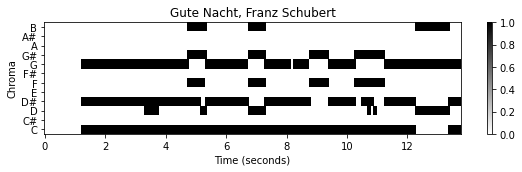

Sonification of annotated Chromagram:


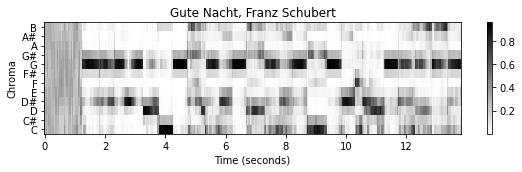

Sonification of computed Chromagram:


Sonification of computed Chromagram and annotated Chromagram:


In [9]:
libfmp.b.plot_chromagram(C_ann_schubert, Fs=Fs_frame, title='Gute Nacht, Franz Schubert', figsize=(8, 2.5))
plt.show()

# Sonified Chromagram from annotation
c_ann_schubert_sonified = sonify_chromagram(C_ann_schubert,H=H,fs=Fs)
print('Sonification of annotated Chromagram:')
ipd.display(ipd.Audio(c_ann_schubert_sonified, rate=Fs))

# Computation of Chromagram from audio using librosa

C_schubert = librosa.feature.chroma_stft(y=schubert_audio, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=H*2)

libfmp.b.plot_chromagram(C_schubert, Fs=Fs_frame, title='Gute Nacht, Franz Schubert', figsize=(8, 2.5))
plt.show()


c_schubert_sonified = sonify_chromagram(C_schubert,H=H,fs=Fs)


print('Sonification of computed Chromagram:')
ipd.display(ipd.Audio(c_schubert_sonified, rate=Fs))


schubert_sonified_w_original = mix_sonification_and_original(sonification=c_ann_schubert_sonified,
                                                             original_audio=c_schubert_sonified,
                                                             gain_lin_sonification=0.5,
                                                             gain_lin_original_audio=1)

print('Sonification of computed Chromagram and annotated Chromagram:')
ipd.display(ipd.Audio(schubert_sonified_w_original, rate=Fs))

In [10]:
schubert_audio, _ = librosa.load(os.path.join('data_audio','demo_chroma','Schubert_D911-01_HU33.wav'), sr=Fs)
bach_sonified_w_original = mix_sonification_and_original(sonification=c_schubert_sonified,
                                                         original_audio=schubert_audio,
                                                         gain_lin_sonification=1,
                                                         gain_lin_original_audio=0.2)

print('Sonification of original Audio and computed Chromagram:')
ipd.display(ipd.Audio(bach_sonified_w_original, rate=Fs))

bach_sonified_w_original = mix_sonification_and_original(sonification=c_ann_schubert_sonified,
                                                         original_audio=schubert_audio,
                                                         gain_lin_sonification=1,
                                                         gain_lin_original_audio=0.2)

print('Sonification of original Audio and annotated Chromagram:')
ipd.display(ipd.Audio(bach_sonified_w_original, rate=Fs))

Sonification of original Audio and computed Chromagram:


Sonification of original Audio and annotated Chromagram:
